## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units = 10, num_neurons = [512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0: 
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.2, 0.5, 0.95]
NESTEROV = [False, True]

In [10]:
from itertools import product
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momen, nes in product(MOMENTUM, NESTOROV):
    keras.backend.clear_session()
    print(f"Experiment with momentum = {momen} and nesterov = {nes}")
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, momentum = momen, nesterov = nes)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)
    model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (x_test, y_test), shuffle = True)
    
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = "exp-momen-%s-nes-%s" % (str(momen), str(nes))
    results[exp_name_tag] = {"train-loss": train_loss, "valid-loss": valid_loss, "train-acc": train_acc, "valid-acc": valid_acc}

Experiment with momentum = 0 and nesterov = False
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
5000

50000/50000 [==============================] - 6s 118us/step - loss: 1.2464 - accuracy: 0.5611 - val_loss: 1.4680 - val_accuracy: 0.4801
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.2439 - accuracy: 0.5635 - val_loss: 1.4704 - val_accuracy: 0.4739
Epoch 50/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2373 - accuracy: 0.5668 - val_loss: 1.5422 - val_accuracy: 0.4566
Experiment with momentum = 0 and nesterov = True
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________

50000/50000 [==============================] - 7s 130us/step - loss: 1.2758 - accuracy: 0.5535 - val_loss: 1.4196 - val_accuracy: 0.4940
Epoch 46/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.2682 - accuracy: 0.5535 - val_loss: 1.3851 - val_accuracy: 0.5069
Epoch 47/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.2625 - accuracy: 0.5546 - val_loss: 1.4565 - val_accuracy: 0.4747
Epoch 48/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.2520 - accuracy: 0.5594 - val_loss: 1.4372 - val_accuracy: 0.4904
Epoch 49/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.2512 - accuracy: 0.5608 - val_loss: 1.6969 - val_accuracy: 0.4119
Epoch 50/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.2465 - accuracy: 0.5627 - val_loss: 1.5079 - val_accuracy: 0.4723
Experiment with momentum = 0.2 and nesterov = False
Model: "model_1"
_________________________________________________

50000/50000 [==============================] - 5s 106us/step - loss: 1.2232 - accuracy: 0.5746 - val_loss: 1.4345 - val_accuracy: 0.4851
Epoch 43/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2140 - accuracy: 0.5760 - val_loss: 1.4098 - val_accuracy: 0.5014
Epoch 44/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.2065 - accuracy: 0.5786 - val_loss: 1.4034 - val_accuracy: 0.5046
Epoch 45/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.2048 - accuracy: 0.5787 - val_loss: 1.4155 - val_accuracy: 0.4954
Epoch 46/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1925 - accuracy: 0.5830 - val_loss: 1.3346 - val_accuracy: 0.5260
Epoch 47/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1828 - accuracy: 0.5871 - val_loss: 1.3800 - val_accuracy: 0.5073
Epoch 48/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.1780 - accuracy: 0.5869 - val_loss:

50000/50000 [==============================] - 7s 138us/step - loss: 1.2690 - accuracy: 0.5542 - val_loss: 1.4355 - val_accuracy: 0.4857
Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2638 - accuracy: 0.5546 - val_loss: 1.3749 - val_accuracy: 0.5155643 - 
Epoch 41/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2531 - accuracy: 0.5590 - val_loss: 1.4887 - val_accuracy: 0.4749
Epoch 42/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.2544 - accuracy: 0.5598 - val_loss: 1.4801 - val_accuracy: 0.4748
Epoch 43/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2491 - accuracy: 0.5627 - val_loss: 1.3995 - val_accuracy: 0.4951
Epoch 44/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.2330 - accuracy: 0.5669 - val_loss: 1.4233 - val_accuracy: 0.4982
Epoch 45/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.2264 - accuracy: 0.5703 - val

50000/50000 [==============================] - 6s 114us/step - loss: 1.1465 - accuracy: 0.5967 - val_loss: 1.3451 - val_accuracy: 0.5271
Epoch 37/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.1348 - accuracy: 0.6010 - val_loss: 1.3777 - val_accuracy: 0.5135
Epoch 38/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1181 - accuracy: 0.6070 - val_loss: 1.4409 - val_accuracy: 0.4926
Epoch 39/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1096 - accuracy: 0.6101 - val_loss: 1.3643 - val_accuracy: 0.5210
Epoch 40/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.0959 - accuracy: 0.6156 - val_loss: 1.3924 - val_accuracy: 0.5123
Epoch 41/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0881 - accuracy: 0.6181 - val_loss: 1.5860 - val_accuracy: 0.4748
Epoch 42/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0837 - accuracy: 0.6199 - val_loss:

50000/50000 [==============================] - 7s 132us/step - loss: 1.1936 - accuracy: 0.5803 - val_loss: 1.5059 - val_accuracy: 0.4692
Epoch 34/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1879 - accuracy: 0.5861 - val_loss: 1.4580 - val_accuracy: 0.4879
Epoch 35/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.1769 - accuracy: 0.5866 - val_loss: 1.3909 - val_accuracy: 0.5071
Epoch 36/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.1673 - accuracy: 0.5898 - val_loss: 1.5019 - val_accuracy: 0.4709
Epoch 37/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1602 - accuracy: 0.5931 - val_loss: 1.4628 - val_accuracy: 0.4862
Epoch 38/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.1493 - accuracy: 0.5969 - val_loss: 1.3981 - val_accuracy: 0.5065
Epoch 39/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.1379 - accuracy: 0.6000 - val_loss:

50000/50000 [==============================] - 6s 111us/step - loss: 0.9418 - accuracy: 0.6624 - val_loss: 1.4046 - val_accuracy: 0.5265
Epoch 31/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.9201 - accuracy: 0.6699 - val_loss: 1.4165 - val_accuracy: 0.5221
Epoch 32/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.9101 - accuracy: 0.6739 - val_loss: 1.4776 - val_accuracy: 0.5226
Epoch 33/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.8850 - accuracy: 0.6815 - val_loss: 1.4362 - val_accuracy: 0.5271
Epoch 34/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.8708 - accuracy: 0.6877 - val_loss: 1.4349 - val_accuracy: 0.5340
Epoch 35/50
50000/50000 [==============================] - 5s 107us/step - loss: 0.8525 - accuracy: 0.6933 - val_loss: 1.4700 - val_accuracy: 0.5195
Epoch 36/50
50000/50000 [==============================] - 5s 105us/step - loss: 0.8303 - accuracy: 0.7029 - val_loss:

50000/50000 [==============================] - 7s 134us/step - loss: 0.8083 - accuracy: 0.7137 - val_loss: 1.4418 - val_accuracy: 0.5357
Epoch 28/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.7697 - accuracy: 0.7232 - val_loss: 1.5645 - val_accuracy: 0.5261
Epoch 29/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7544 - accuracy: 0.7299 - val_loss: 1.5510 - val_accuracy: 0.5246
Epoch 30/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.7380 - accuracy: 0.7350 - val_loss: 1.5333 - val_accuracy: 0.5382
Epoch 31/50
50000/50000 [==============================] - 7s 136us/step - loss: 0.7084 - accuracy: 0.7458 - val_loss: 1.5451 - val_accuracy: 0.5335
Epoch 32/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.6880 - accuracy: 0.7542 - val_loss: 1.5763 - val_accuracy: 0.5346
Epoch 33/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.6574 - accuracy: 0.7647 - val_loss:

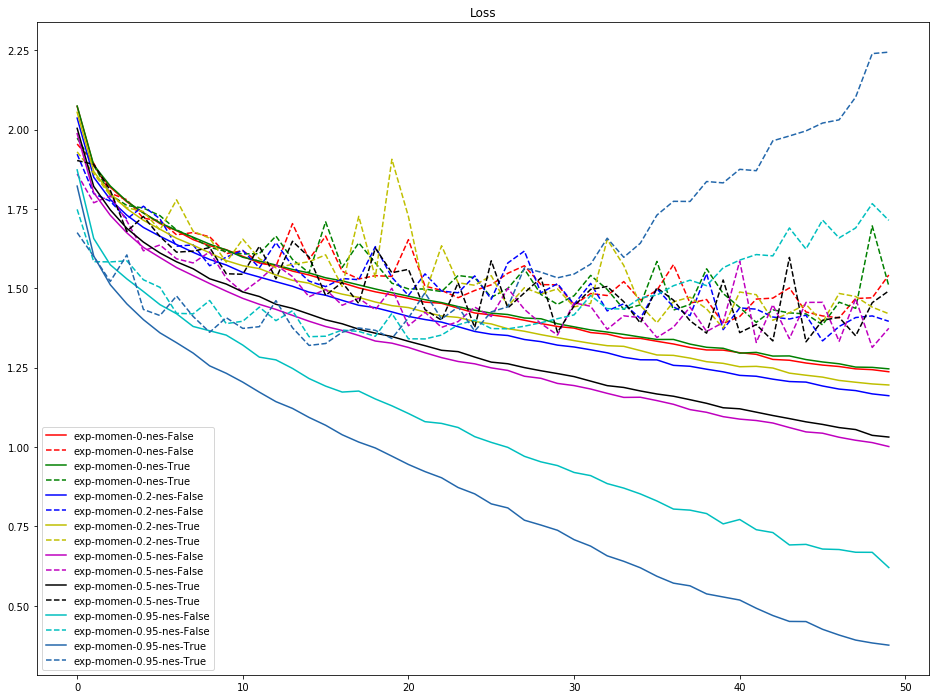

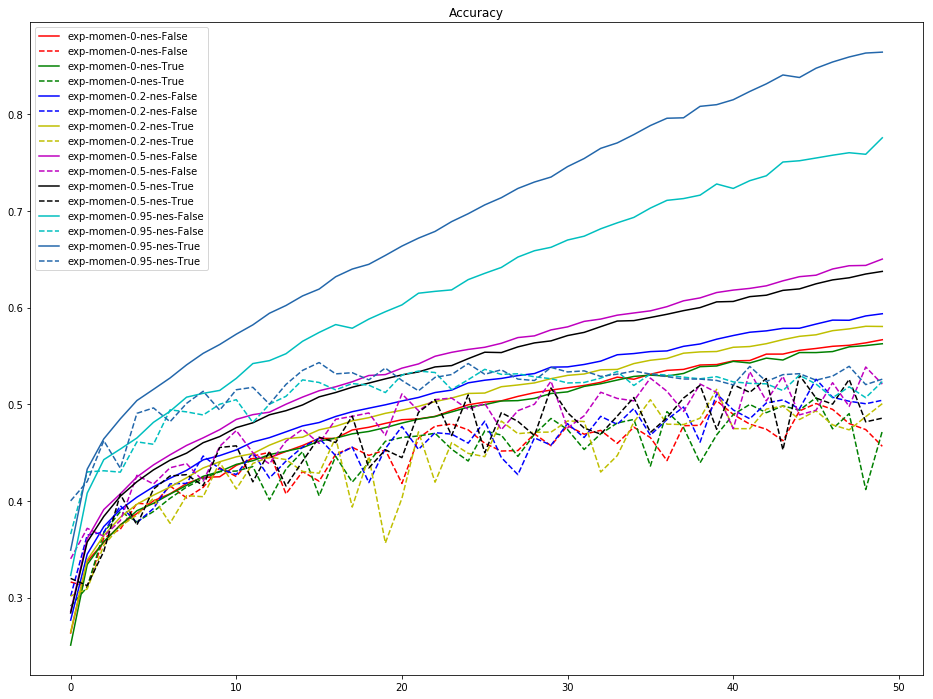

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k', 'c', '#2367AB']

plt.figure(figsize = (16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label = cond, color = color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize = (16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '--', label = cond, color = color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()